## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  29.167520  1188.423862  0.221717  8.331322  1.281779
1  86.336323   192.706432  0.772882  3.827623  1.156548
2  41.253223   398.325194  0.675448  3.706276  1.490720
3  13.274987  1267.315629  0.049637  9.305914  1.403368
4  10.734488   227.387890  0.602668  6.962103  1.361025


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.27    | train_mse: 7.5161  | train_mae: 1.91656 |  0:00:00s
epoch 1  | loss: 0.8446  | train_mse: 5.07319 | train_mae: 1.592   |  0:00:00s


epoch 2  | loss: 1.02865 | train_mse: 4.24511 | train_mae: 1.50072 |  0:00:00s
epoch 3  | loss: 0.89767 | train_mse: 3.51104 | train_mae: 1.36081 |  0:00:00s


epoch 4  | loss: 0.75759 | train_mse: 3.01152 | train_mae: 1.26377 |  0:00:00s


epoch 5  | loss: 0.84281 | train_mse: 2.49844 | train_mae: 1.16644 |  0:00:01s


epoch 6  | loss: 0.6553  | train_mse: 2.07406 | train_mae: 1.07806 |  0:00:01s


epoch 7  | loss: 0.69498 | train_mse: 1.74698 | train_mae: 1.00835 |  0:00:01s
epoch 8  | loss: 0.619   | train_mse: 1.51064 | train_mae: 0.93805 |  0:00:01s


epoch 9  | loss: 0.52185 | train_mse: 1.31625 | train_mae: 0.87814 |  0:00:02s
epoch 10 | loss: 0.67107 | train_mse: 1.2208  | train_mae: 0.84283 |  0:00:02s


epoch 11 | loss: 0.69416 | train_mse: 1.07456 | train_mae: 0.79046 |  0:00:02s
epoch 12 | loss: 0.70084 | train_mse: 0.96537 | train_mae: 0.74875 |  0:00:02s


epoch 13 | loss: 0.62105 | train_mse: 0.90882 | train_mae: 0.72353 |  0:00:02s


epoch 14 | loss: 0.59967 | train_mse: 0.85954 | train_mae: 0.70055 |  0:00:03s
epoch 15 | loss: 0.62644 | train_mse: 0.81771 | train_mae: 0.68301 |  0:00:03s


epoch 16 | loss: 0.41265 | train_mse: 0.78708 | train_mae: 0.66728 |  0:00:03s
epoch 17 | loss: 0.51063 | train_mse: 0.75376 | train_mae: 0.65654 |  0:00:03s


epoch 18 | loss: 0.45699 | train_mse: 0.7244  | train_mae: 0.64572 |  0:00:03s
epoch 19 | loss: 0.42702 | train_mse: 0.68255 | train_mae: 0.62627 |  0:00:04s


epoch 20 | loss: 0.52897 | train_mse: 0.64076 | train_mae: 0.60868 |  0:00:04s
epoch 21 | loss: 0.45035 | train_mse: 0.61244 | train_mae: 0.59585 |  0:00:04s


epoch 22 | loss: 0.43887 | train_mse: 0.57341 | train_mae: 0.57709 |  0:00:04s
epoch 23 | loss: 0.38761 | train_mse: 0.53388 | train_mae: 0.55847 |  0:00:04s


epoch 24 | loss: 0.49425 | train_mse: 0.50848 | train_mae: 0.54323 |  0:00:05s
epoch 25 | loss: 0.43908 | train_mse: 0.48511 | train_mae: 0.53045 |  0:00:05s

epoch 26 | loss: 0.42958 | train_mse: 0.46936 | train_mae: 0.52099 |  0:00:05s


epoch 27 | loss: 0.34758 | train_mse: 0.45549 | train_mae: 0.51087 |  0:00:05s
epoch 28 | loss: 0.52326 | train_mse: 0.43612 | train_mae: 0.49857 |  0:00:05s


epoch 29 | loss: 0.45553 | train_mse: 0.42515 | train_mae: 0.49057 |  0:00:06s


epoch 30 | loss: 0.42972 | train_mse: 0.41566 | train_mae: 0.4796  |  0:00:06s


epoch 31 | loss: 0.41949 | train_mse: 0.39829 | train_mae: 0.46681 |  0:00:06s
epoch 32 | loss: 0.46432 | train_mse: 0.39217 | train_mae: 0.4564  |  0:00:06s


epoch 33 | loss: 0.37921 | train_mse: 0.38899 | train_mae: 0.45108 |  0:00:06s
epoch 34 | loss: 0.37205 | train_mse: 0.37645 | train_mae: 0.44141 |  0:00:06s


epoch 35 | loss: 0.39982 | train_mse: 0.36844 | train_mae: 0.43856 |  0:00:07s
epoch 36 | loss: 0.38773 | train_mse: 0.35151 | train_mae: 0.43269 |  0:00:07s


epoch 37 | loss: 0.3241  | train_mse: 0.33481 | train_mae: 0.42555 |  0:00:07s


epoch 38 | loss: 0.35712 | train_mse: 0.32093 | train_mae: 0.41763 |  0:00:07s
epoch 39 | loss: 0.28629 | train_mse: 0.30953 | train_mae: 0.41182 |  0:00:07s


epoch 40 | loss: 0.38388 | train_mse: 0.29896 | train_mae: 0.40693 |  0:00:07s
epoch 41 | loss: 0.37227 | train_mse: 0.28535 | train_mae: 0.39923 |  0:00:07s


epoch 42 | loss: 0.20631 | train_mse: 0.27108 | train_mae: 0.3907  |  0:00:08s
epoch 43 | loss: 0.40144 | train_mse: 0.25901 | train_mae: 0.38196 |  0:00:08s


epoch 44 | loss: 0.28166 | train_mse: 0.25257 | train_mae: 0.3769  |  0:00:08s
epoch 45 | loss: 0.26028 | train_mse: 0.25406 | train_mae: 0.37684 |  0:00:08s


epoch 46 | loss: 0.23424 | train_mse: 0.24237 | train_mae: 0.3656  |  0:00:08s
epoch 47 | loss: 0.34838 | train_mse: 0.23184 | train_mae: 0.35976 |  0:00:08s


epoch 48 | loss: 0.31077 | train_mse: 0.22666 | train_mae: 0.35881 |  0:00:09s
epoch 49 | loss: 0.4608  | train_mse: 0.22411 | train_mae: 0.35765 |  0:00:09s


epoch 50 | loss: 0.2854  | train_mse: 0.221   | train_mae: 0.35573 |  0:00:09s
epoch 51 | loss: 0.23164 | train_mse: 0.21602 | train_mae: 0.35224 |  0:00:09s


epoch 52 | loss: 0.25949 | train_mse: 0.21387 | train_mae: 0.34371 |  0:00:09s
epoch 53 | loss: 0.21693 | train_mse: 0.2098  | train_mae: 0.33861 |  0:00:09s


epoch 54 | loss: 0.31938 | train_mse: 0.209   | train_mae: 0.33516 |  0:00:09s
epoch 55 | loss: 0.26578 | train_mse: 0.24302 | train_mae: 0.35599 |  0:00:10s


epoch 56 | loss: 0.28593 | train_mse: 0.26587 | train_mae: 0.36189 |  0:00:10s
epoch 57 | loss: 0.31464 | train_mse: 0.21994 | train_mae: 0.34371 |  0:00:10s


epoch 58 | loss: 0.33199 | train_mse: 0.21022 | train_mae: 0.33731 |  0:00:10s
epoch 59 | loss: 0.23378 | train_mse: 0.19598 | train_mae: 0.32375 |  0:00:10s


epoch 60 | loss: 0.26899 | train_mse: 0.19523 | train_mae: 0.32871 |  0:00:10s
epoch 61 | loss: 0.22867 | train_mse: 0.25258 | train_mae: 0.34797 |  0:00:10s


epoch 62 | loss: 0.28238 | train_mse: 0.23668 | train_mae: 0.3395  |  0:00:10s
epoch 63 | loss: 0.29446 | train_mse: 0.24491 | train_mae: 0.33992 |  0:00:11s


epoch 64 | loss: 0.26766 | train_mse: 0.24699 | train_mae: 0.34409 |  0:00:11s
epoch 65 | loss: 0.33872 | train_mse: 0.24105 | train_mae: 0.33867 |  0:00:11s
epoch 66 | loss: 0.29649 | train_mse: 0.23561 | train_mae: 0.33469 |  0:00:11s


epoch 67 | loss: 0.31981 | train_mse: 0.22635 | train_mae: 0.33309 |  0:00:11s
epoch 68 | loss: 0.30435 | train_mse: 0.16845 | train_mae: 0.30799 |  0:00:11s
epoch 69 | loss: 0.29436 | train_mse: 0.16145 | train_mae: 0.29803 |  0:00:11s


epoch 70 | loss: 0.23468 | train_mse: 0.16054 | train_mae: 0.29528 |  0:00:11s
epoch 71 | loss: 0.24995 | train_mse: 0.17257 | train_mae: 0.30247 |  0:00:11s
epoch 72 | loss: 0.27584 | train_mse: 0.21268 | train_mae: 0.3155  |  0:00:11s


epoch 73 | loss: 0.21756 | train_mse: 0.19609 | train_mae: 0.31163 |  0:00:11s
epoch 74 | loss: 0.38835 | train_mse: 0.21586 | train_mae: 0.31689 |  0:00:12s
epoch 75 | loss: 0.18216 | train_mse: 0.20998 | train_mae: 0.31152 |  0:00:12s


epoch 76 | loss: 0.30871 | train_mse: 0.20199 | train_mae: 0.3055  |  0:00:12s
epoch 77 | loss: 0.33923 | train_mse: 0.19643 | train_mae: 0.29911 |  0:00:12s
epoch 78 | loss: 0.30027 | train_mse: 0.19309 | train_mae: 0.29912 |  0:00:12s


epoch 79 | loss: 0.192   | train_mse: 0.19117 | train_mae: 0.29702 |  0:00:12s
epoch 80 | loss: 0.33122 | train_mse: 0.14836 | train_mae: 0.28103 |  0:00:12s


epoch 81 | loss: 0.28873 | train_mse: 0.13228 | train_mae: 0.26754 |  0:00:12s
epoch 82 | loss: 0.18859 | train_mse: 0.13211 | train_mae: 0.26841 |  0:00:12s
epoch 83 | loss: 0.26761 | train_mse: 0.13154 | train_mae: 0.26889 |  0:00:12s


epoch 84 | loss: 0.29319 | train_mse: 0.1314  | train_mae: 0.26819 |  0:00:13s
epoch 85 | loss: 0.25841 | train_mse: 0.13249 | train_mae: 0.26753 |  0:00:13s


epoch 86 | loss: 0.22997 | train_mse: 0.13567 | train_mae: 0.27086 |  0:00:13s
epoch 87 | loss: 0.20326 | train_mse: 0.13654 | train_mae: 0.27302 |  0:00:13s
epoch 88 | loss: 0.16252 | train_mse: 0.13561 | train_mae: 0.27197 |  0:00:13s


epoch 89 | loss: 0.22242 | train_mse: 0.13708 | train_mae: 0.27288 |  0:00:13s
epoch 90 | loss: 0.24644 | train_mse: 0.13823 | train_mae: 0.2731  |  0:00:13s
epoch 91 | loss: 0.1866  | train_mse: 0.13856 | train_mae: 0.27495 |  0:00:13s


epoch 92 | loss: 0.19824 | train_mse: 0.13624 | train_mae: 0.27002 |  0:00:13s
epoch 93 | loss: 0.26041 | train_mse: 0.13824 | train_mae: 0.27261 |  0:00:13s
epoch 94 | loss: 0.2578  | train_mse: 0.1471  | train_mae: 0.2814  |  0:00:13s


epoch 95 | loss: 0.26054 | train_mse: 0.17287 | train_mae: 0.29049 |  0:00:13s
epoch 96 | loss: 0.20639 | train_mse: 0.13158 | train_mae: 0.26528 |  0:00:14s


epoch 97 | loss: 0.22555 | train_mse: 0.12961 | train_mae: 0.26459 |  0:00:14s
epoch 98 | loss: 0.16737 | train_mse: 0.12708 | train_mae: 0.2609  |  0:00:14s


epoch 99 | loss: 0.27032 | train_mse: 0.1258  | train_mae: 0.25593 |  0:00:14s
epoch 100| loss: 0.18987 | train_mse: 0.12587 | train_mae: 0.25719 |  0:00:14s
epoch 101| loss: 0.16745 | train_mse: 0.12691 | train_mae: 0.25844 |  0:00:14s


epoch 102| loss: 0.23703 | train_mse: 0.12641 | train_mae: 0.25905 |  0:00:14s
epoch 103| loss: 0.20025 | train_mse: 0.12902 | train_mae: 0.26218 |  0:00:14s
epoch 104| loss: 0.16868 | train_mse: 0.12779 | train_mae: 0.26037 |  0:00:14s


epoch 105| loss: 0.16443 | train_mse: 0.12968 | train_mae: 0.26306 |  0:00:14s
epoch 106| loss: 0.20802 | train_mse: 0.12971 | train_mae: 0.26046 |  0:00:15s


epoch 107| loss: 0.19875 | train_mse: 0.12832 | train_mae: 0.25721 |  0:00:15s
epoch 108| loss: 0.21595 | train_mse: 0.12617 | train_mae: 0.25642 |  0:00:15s
epoch 109| loss: 0.18116 | train_mse: 0.1231  | train_mae: 0.25264 |  0:00:15s


epoch 110| loss: 0.35036 | train_mse: 0.11763 | train_mae: 0.24708 |  0:00:15s
epoch 111| loss: 0.17068 | train_mse: 0.11307 | train_mae: 0.24007 |  0:00:15s
epoch 112| loss: 0.23059 | train_mse: 0.11369 | train_mae: 0.24111 |  0:00:15s


epoch 113| loss: 0.22849 | train_mse: 0.11483 | train_mae: 0.24475 |  0:00:15s
epoch 114| loss: 0.14435 | train_mse: 0.14649 | train_mae: 0.26497 |  0:00:15s
epoch 115| loss: 0.24022 | train_mse: 0.15654 | train_mae: 0.26772 |  0:00:15s


epoch 116| loss: 0.16885 | train_mse: 0.15074 | train_mae: 0.26613 |  0:00:15s
epoch 117| loss: 0.22819 | train_mse: 0.14356 | train_mae: 0.26305 |  0:00:15s


epoch 118| loss: 0.22049 | train_mse: 0.14259 | train_mae: 0.26088 |  0:00:16s
epoch 119| loss: 0.18706 | train_mse: 0.14291 | train_mae: 0.26169 |  0:00:16s
epoch 120| loss: 0.29611 | train_mse: 0.14355 | train_mae: 0.26293 |  0:00:16s


epoch 121| loss: 0.22606 | train_mse: 0.14525 | train_mae: 0.26307 |  0:00:16s
epoch 122| loss: 0.19989 | train_mse: 0.14465 | train_mae: 0.25854 |  0:00:16s
epoch 123| loss: 0.32882 | train_mse: 0.14326 | train_mae: 0.25871 |  0:00:16s


epoch 124| loss: 0.16662 | train_mse: 0.13689 | train_mae: 0.2582  |  0:00:16s
epoch 125| loss: 0.27981 | train_mse: 0.13732 | train_mae: 0.2603  |  0:00:16s
epoch 126| loss: 0.25315 | train_mse: 0.13665 | train_mae: 0.25832 |  0:00:16s


epoch 127| loss: 0.18817 | train_mse: 0.1347  | train_mae: 0.25926 |  0:00:16s
epoch 128| loss: 0.18039 | train_mse: 0.135   | train_mae: 0.2603  |  0:00:16s
epoch 129| loss: 0.22141 | train_mse: 0.13178 | train_mae: 0.2568  |  0:00:17s


epoch 130| loss: 0.17752 | train_mse: 0.12716 | train_mae: 0.24988 |  0:00:17s
epoch 131| loss: 0.25724 | train_mse: 0.12785 | train_mae: 0.25086 |  0:00:17s
epoch 132| loss: 0.23786 | train_mse: 0.12696 | train_mae: 0.24828 |  0:00:17s


epoch 133| loss: 0.10632 | train_mse: 0.1277  | train_mae: 0.24769 |  0:00:17s
epoch 134| loss: 0.16355 | train_mse: 0.13103 | train_mae: 0.24882 |  0:00:17s


epoch 135| loss: 0.1662  | train_mse: 0.13165 | train_mae: 0.24972 |  0:00:17s
epoch 136| loss: 0.23258 | train_mse: 0.12763 | train_mae: 0.24916 |  0:00:17s


epoch 137| loss: 0.23346 | train_mse: 0.12499 | train_mae: 0.2477  |  0:00:17s
epoch 138| loss: 0.19076 | train_mse: 0.11972 | train_mae: 0.24334 |  0:00:17s
epoch 139| loss: 0.13741 | train_mse: 0.08681 | train_mae: 0.2221  |  0:00:18s


epoch 140| loss: 0.16908 | train_mse: 0.08934 | train_mae: 0.22567 |  0:00:18s
epoch 141| loss: 0.16224 | train_mse: 0.12256 | train_mae: 0.24089 |  0:00:18s
epoch 142| loss: 0.22704 | train_mse: 0.11452 | train_mae: 0.23823 |  0:00:18s


epoch 143| loss: 0.16379 | train_mse: 0.11461 | train_mae: 0.23914 |  0:00:18s
epoch 144| loss: 0.18187 | train_mse: 0.12236 | train_mae: 0.24156 |  0:00:18s
epoch 145| loss: 0.21231 | train_mse: 0.13473 | train_mae: 0.24975 |  0:00:18s


epoch 146| loss: 0.22485 | train_mse: 0.12966 | train_mae: 0.2502  |  0:00:18s
epoch 147| loss: 0.13372 | train_mse: 0.12658 | train_mae: 0.24971 |  0:00:18s
epoch 148| loss: 0.20112 | train_mse: 0.12834 | train_mae: 0.25057 |  0:00:18s


epoch 149| loss: 0.17628 | train_mse: 0.12858 | train_mae: 0.2481  |  0:00:18s
epoch 150| loss: 0.15272 | train_mse: 0.12414 | train_mae: 0.24044 |  0:00:19s
epoch 151| loss: 0.12212 | train_mse: 0.11435 | train_mae: 0.23482 |  0:00:19s


epoch 152| loss: 0.25411 | train_mse: 0.09811 | train_mae: 0.22456 |  0:00:19s
epoch 153| loss: 0.13681 | train_mse: 0.09292 | train_mae: 0.22065 |  0:00:19s
epoch 154| loss: 0.20575 | train_mse: 0.0939  | train_mae: 0.22416 |  0:00:19s


epoch 155| loss: 0.14512 | train_mse: 0.0985  | train_mae: 0.22916 |  0:00:19s
epoch 156| loss: 0.2595  | train_mse: 0.09382 | train_mae: 0.22456 |  0:00:19s
epoch 157| loss: 0.20568 | train_mse: 0.09268 | train_mae: 0.2242  |  0:00:19s


epoch 158| loss: 0.15651 | train_mse: 0.10741 | train_mae: 0.23352 |  0:00:19s
epoch 159| loss: 0.15386 | train_mse: 0.10989 | train_mae: 0.23302 |  0:00:19s
epoch 160| loss: 0.25214 | train_mse: 0.10515 | train_mae: 0.22708 |  0:00:19s


epoch 161| loss: 0.14643 | train_mse: 0.10026 | train_mae: 0.22336 |  0:00:19s
epoch 162| loss: 0.1443  | train_mse: 0.0971  | train_mae: 0.21644 |  0:00:20s
epoch 163| loss: 0.19781 | train_mse: 0.09697 | train_mae: 0.21368 |  0:00:20s


epoch 164| loss: 0.19957 | train_mse: 0.0948  | train_mae: 0.20926 |  0:00:20s
epoch 165| loss: 0.32485 | train_mse: 0.09393 | train_mae: 0.20674 |  0:00:20s
epoch 166| loss: 0.23081 | train_mse: 0.09334 | train_mae: 0.20562 |  0:00:20s


epoch 167| loss: 0.14396 | train_mse: 0.09394 | train_mae: 0.20817 |  0:00:20s
epoch 168| loss: 0.15398 | train_mse: 0.09203 | train_mae: 0.20814 |  0:00:20s
epoch 169| loss: 0.17303 | train_mse: 0.09282 | train_mae: 0.2108  |  0:00:20s


epoch 170| loss: 0.19064 | train_mse: 0.07937 | train_mae: 0.20961 |  0:00:20s
epoch 171| loss: 0.14299 | train_mse: 0.08236 | train_mae: 0.21509 |  0:00:20s
epoch 172| loss: 0.16153 | train_mse: 0.08834 | train_mae: 0.22302 |  0:00:21s


epoch 173| loss: 0.21996 | train_mse: 0.08899 | train_mae: 0.22578 |  0:00:21s
epoch 174| loss: 0.1577  | train_mse: 0.08965 | train_mae: 0.22926 |  0:00:21s
epoch 175| loss: 0.16165 | train_mse: 0.08519 | train_mae: 0.22685 |  0:00:21s


epoch 176| loss: 0.14144 | train_mse: 0.07962 | train_mae: 0.22026 |  0:00:21s
epoch 177| loss: 0.25856 | train_mse: 0.07979 | train_mae: 0.2193  |  0:00:21s
epoch 178| loss: 0.19365 | train_mse: 0.07718 | train_mae: 0.21394 |  0:00:21s


epoch 179| loss: 0.16514 | train_mse: 0.0758  | train_mae: 0.20958 |  0:00:21s
epoch 180| loss: 0.10484 | train_mse: 0.07468 | train_mae: 0.20614 |  0:00:21s
epoch 181| loss: 0.17172 | train_mse: 0.07303 | train_mae: 0.20267 |  0:00:21s


epoch 182| loss: 0.11732 | train_mse: 0.07597 | train_mae: 0.2055  |  0:00:21s
epoch 183| loss: 0.13979 | train_mse: 0.07425 | train_mae: 0.20366 |  0:00:21s
epoch 184| loss: 0.11446 | train_mse: 0.07356 | train_mae: 0.20272 |  0:00:22s


epoch 185| loss: 0.19197 | train_mse: 0.07249 | train_mae: 0.20129 |  0:00:22s
epoch 186| loss: 0.1408  | train_mse: 0.07301 | train_mae: 0.20109 |  0:00:22s
epoch 187| loss: 0.2513  | train_mse: 0.07664 | train_mae: 0.20648 |  0:00:22s


epoch 188| loss: 0.17071 | train_mse: 0.07738 | train_mae: 0.20778 |  0:00:22s
epoch 189| loss: 0.12476 | train_mse: 0.07617 | train_mae: 0.20621 |  0:00:22s
epoch 190| loss: 0.1084  | train_mse: 0.07647 | train_mae: 0.20642 |  0:00:22s


epoch 191| loss: 0.19492 | train_mse: 0.07718 | train_mae: 0.20864 |  0:00:22s
epoch 192| loss: 0.22022 | train_mse: 0.07529 | train_mae: 0.20692 |  0:00:22s
epoch 193| loss: 0.22793 | train_mse: 0.07382 | train_mae: 0.20515 |  0:00:22s


epoch 194| loss: 0.28808 | train_mse: 0.07298 | train_mae: 0.20483 |  0:00:22s
epoch 195| loss: 0.12281 | train_mse: 0.0742  | train_mae: 0.20762 |  0:00:23s
epoch 196| loss: 0.19024 | train_mse: 0.08289 | train_mae: 0.21567 |  0:00:23s


epoch 197| loss: 0.11461 | train_mse: 0.08481 | train_mae: 0.21672 |  0:00:23s
epoch 198| loss: 0.18642 | train_mse: 0.08116 | train_mae: 0.21224 |  0:00:23s
epoch 199| loss: 0.12419 | train_mse: 0.08308 | train_mae: 0.21498 |  0:00:23s


epoch 200| loss: 0.17619 | train_mse: 0.0832  | train_mae: 0.21363 |  0:00:23s
epoch 201| loss: 0.12121 | train_mse: 0.0817  | train_mae: 0.21071 |  0:00:23s
epoch 202| loss: 0.23896 | train_mse: 0.08107 | train_mae: 0.20903 |  0:00:23s


epoch 203| loss: 0.29899 | train_mse: 0.08534 | train_mae: 0.21677 |  0:00:23s
epoch 204| loss: 0.11662 | train_mse: 0.07981 | train_mae: 0.21157 |  0:00:23s
epoch 205| loss: 0.21467 | train_mse: 0.07627 | train_mae: 0.20957 |  0:00:23s


epoch 206| loss: 0.23247 | train_mse: 0.07043 | train_mae: 0.20084 |  0:00:23s
epoch 207| loss: 0.15746 | train_mse: 0.07076 | train_mae: 0.19919 |  0:00:24s
epoch 208| loss: 0.1653  | train_mse: 0.07162 | train_mae: 0.19795 |  0:00:24s


epoch 209| loss: 0.14588 | train_mse: 0.07357 | train_mae: 0.20098 |  0:00:24s
epoch 210| loss: 0.10696 | train_mse: 0.07646 | train_mae: 0.20405 |  0:00:24s
epoch 211| loss: 0.12207 | train_mse: 0.07771 | train_mae: 0.20657 |  0:00:24s


epoch 212| loss: 0.14682 | train_mse: 0.07202 | train_mae: 0.2026  |  0:00:24s
epoch 213| loss: 0.15426 | train_mse: 0.07005 | train_mae: 0.20452 |  0:00:24s
epoch 214| loss: 0.11671 | train_mse: 0.07008 | train_mae: 0.2062  |  0:00:24s


epoch 215| loss: 0.12511 | train_mse: 0.06558 | train_mae: 0.20208 |  0:00:24s
epoch 216| loss: 0.11527 | train_mse: 0.06498 | train_mae: 0.19936 |  0:00:24s
epoch 217| loss: 0.11994 | train_mse: 0.06273 | train_mae: 0.19537 |  0:00:24s


epoch 218| loss: 0.20142 | train_mse: 0.06224 | train_mae: 0.19189 |  0:00:25s
epoch 219| loss: 0.09433 | train_mse: 0.06541 | train_mae: 0.19606 |  0:00:25s
epoch 220| loss: 0.1139  | train_mse: 0.07535 | train_mae: 0.20605 |  0:00:25s


epoch 221| loss: 0.13595 | train_mse: 0.07936 | train_mae: 0.20896 |  0:00:25s
epoch 222| loss: 0.09026 | train_mse: 0.07803 | train_mae: 0.2054  |  0:00:25s
epoch 223| loss: 0.16612 | train_mse: 0.07597 | train_mae: 0.20171 |  0:00:25s


epoch 224| loss: 0.27337 | train_mse: 0.07781 | train_mae: 0.20172 |  0:00:25s
epoch 225| loss: 0.17288 | train_mse: 0.07505 | train_mae: 0.19905 |  0:00:25s
epoch 226| loss: 0.09932 | train_mse: 0.07081 | train_mae: 0.1938  |  0:00:25s


epoch 227| loss: 0.11511 | train_mse: 0.06629 | train_mae: 0.19113 |  0:00:25s
epoch 228| loss: 0.12339 | train_mse: 0.06093 | train_mae: 0.18582 |  0:00:25s
epoch 229| loss: 0.09689 | train_mse: 0.05887 | train_mae: 0.18574 |  0:00:26s


epoch 230| loss: 0.15906 | train_mse: 0.05781 | train_mae: 0.18558 |  0:00:26s
epoch 231| loss: 0.10661 | train_mse: 0.05474 | train_mae: 0.18152 |  0:00:26s
epoch 232| loss: 0.08032 | train_mse: 0.05753 | train_mae: 0.18631 |  0:00:26s


epoch 233| loss: 0.20336 | train_mse: 0.06201 | train_mae: 0.19148 |  0:00:26s
epoch 234| loss: 0.1151  | train_mse: 0.06452 | train_mae: 0.19454 |  0:00:26s
epoch 235| loss: 0.08337 | train_mse: 0.06845 | train_mae: 0.19909 |  0:00:26s


epoch 236| loss: 0.08997 | train_mse: 0.07399 | train_mae: 0.20571 |  0:00:26s
epoch 237| loss: 0.17969 | train_mse: 0.08308 | train_mae: 0.21419 |  0:00:26s
epoch 238| loss: 0.19169 | train_mse: 0.07572 | train_mae: 0.20587 |  0:00:26s


epoch 239| loss: 0.12787 | train_mse: 0.06931 | train_mae: 0.19845 |  0:00:26s
epoch 240| loss: 0.18401 | train_mse: 0.06427 | train_mae: 0.19132 |  0:00:27s


epoch 241| loss: 0.10168 | train_mse: 0.0601  | train_mae: 0.18532 |  0:00:27s
epoch 242| loss: 0.1085  | train_mse: 0.05798 | train_mae: 0.18253 |  0:00:27s
epoch 243| loss: 0.09184 | train_mse: 0.0587  | train_mae: 0.18356 |  0:00:27s


epoch 244| loss: 0.12635 | train_mse: 0.05535 | train_mae: 0.17778 |  0:00:27s
epoch 245| loss: 0.17978 | train_mse: 0.05171 | train_mae: 0.17138 |  0:00:27s


epoch 246| loss: 0.10448 | train_mse: 0.05094 | train_mae: 0.17077 |  0:00:27s
epoch 247| loss: 0.12203 | train_mse: 0.05248 | train_mae: 0.17349 |  0:00:27s


epoch 248| loss: 0.1339  | train_mse: 0.05299 | train_mae: 0.17642 |  0:00:28s
epoch 249| loss: 0.18185 | train_mse: 0.05621 | train_mae: 0.17879 |  0:00:28s
epoch 250| loss: 0.14081 | train_mse: 0.05822 | train_mae: 0.18206 |  0:00:28s


epoch 251| loss: 0.09176 | train_mse: 0.05823 | train_mae: 0.18191 |  0:00:28s
epoch 252| loss: 0.10258 | train_mse: 0.05773 | train_mae: 0.18118 |  0:00:28s
epoch 253| loss: 0.17246 | train_mse: 0.05671 | train_mae: 0.179   |  0:00:28s


epoch 254| loss: 0.17212 | train_mse: 0.05539 | train_mae: 0.17727 |  0:00:28s
epoch 255| loss: 0.13126 | train_mse: 0.05698 | train_mae: 0.18155 |  0:00:28s
epoch 256| loss: 0.06588 | train_mse: 0.06046 | train_mae: 0.18639 |  0:00:28s


epoch 257| loss: 0.10858 | train_mse: 0.06823 | train_mae: 0.1952  |  0:00:28s
epoch 258| loss: 0.11107 | train_mse: 0.07311 | train_mae: 0.19824 |  0:00:28s
epoch 259| loss: 0.15391 | train_mse: 0.07042 | train_mae: 0.19659 |  0:00:29s


epoch 260| loss: 0.09928 | train_mse: 0.06289 | train_mae: 0.18919 |  0:00:29s
epoch 261| loss: 0.14935 | train_mse: 0.05627 | train_mae: 0.18386 |  0:00:29s
epoch 262| loss: 0.12688 | train_mse: 0.05194 | train_mae: 0.1779  |  0:00:29s


epoch 263| loss: 0.09305 | train_mse: 0.05075 | train_mae: 0.17466 |  0:00:29s
epoch 264| loss: 0.08876 | train_mse: 0.05329 | train_mae: 0.178   |  0:00:29s
epoch 265| loss: 0.1183  | train_mse: 0.05427 | train_mae: 0.18011 |  0:00:29s


epoch 266| loss: 0.15069 | train_mse: 0.05727 | train_mae: 0.18434 |  0:00:29s
epoch 267| loss: 0.08939 | train_mse: 0.05864 | train_mae: 0.18662 |  0:00:29s
epoch 268| loss: 0.08077 | train_mse: 0.05534 | train_mae: 0.18217 |  0:00:29s


epoch 269| loss: 0.09136 | train_mse: 0.05521 | train_mae: 0.18195 |  0:00:29s
epoch 270| loss: 0.2265  | train_mse: 0.05732 | train_mae: 0.18407 |  0:00:30s
epoch 271| loss: 0.10549 | train_mse: 0.058   | train_mae: 0.18551 |  0:00:30s


epoch 272| loss: 0.10772 | train_mse: 0.05642 | train_mae: 0.18392 |  0:00:30s
epoch 273| loss: 0.19874 | train_mse: 0.05427 | train_mae: 0.18032 |  0:00:30s


epoch 274| loss: 0.16316 | train_mse: 0.05039 | train_mae: 0.17359 |  0:00:30s
epoch 275| loss: 0.08606 | train_mse: 0.0494  | train_mae: 0.17308 |  0:00:30s
epoch 276| loss: 0.17691 | train_mse: 0.05436 | train_mae: 0.18184 |  0:00:30s


epoch 277| loss: 0.13546 | train_mse: 0.05578 | train_mae: 0.18325 |  0:00:30s
epoch 278| loss: 0.06505 | train_mse: 0.05525 | train_mae: 0.18338 |  0:00:30s
epoch 279| loss: 0.098   | train_mse: 0.05752 | train_mae: 0.18723 |  0:00:30s


epoch 280| loss: 0.07241 | train_mse: 0.05428 | train_mae: 0.18253 |  0:00:30s
epoch 281| loss: 0.08999 | train_mse: 0.05492 | train_mae: 0.18327 |  0:00:31s


epoch 282| loss: 0.09441 | train_mse: 0.05623 | train_mae: 0.18488 |  0:00:31s
epoch 283| loss: 0.09933 | train_mse: 0.05471 | train_mae: 0.1813  |  0:00:31s
epoch 284| loss: 0.10938 | train_mse: 0.05447 | train_mae: 0.17956 |  0:00:31s


epoch 285| loss: 0.18677 | train_mse: 0.05238 | train_mae: 0.17535 |  0:00:31s
epoch 286| loss: 0.11046 | train_mse: 0.05129 | train_mae: 0.17414 |  0:00:31s


epoch 287| loss: 0.16673 | train_mse: 0.05295 | train_mae: 0.17533 |  0:00:31s
epoch 288| loss: 0.07254 | train_mse: 0.0505  | train_mae: 0.17391 |  0:00:31s


epoch 289| loss: 0.12365 | train_mse: 0.04975 | train_mae: 0.17484 |  0:00:31s
epoch 290| loss: 0.07906 | train_mse: 0.04777 | train_mae: 0.17221 |  0:00:32s


epoch 291| loss: 0.14301 | train_mse: 0.04733 | train_mae: 0.1718  |  0:00:32s
epoch 292| loss: 0.12557 | train_mse: 0.04769 | train_mae: 0.17291 |  0:00:32s


epoch 293| loss: 0.10748 | train_mse: 0.0496  | train_mae: 0.17614 |  0:00:32s
epoch 294| loss: 0.11003 | train_mse: 0.05027 | train_mae: 0.17657 |  0:00:32s


epoch 295| loss: 0.08645 | train_mse: 0.05018 | train_mae: 0.17513 |  0:00:32s
epoch 296| loss: 0.08238 | train_mse: 0.04693 | train_mae: 0.1696  |  0:00:32s


epoch 297| loss: 0.11812 | train_mse: 0.04786 | train_mae: 0.16723 |  0:00:32s
epoch 298| loss: 0.09116 | train_mse: 0.04725 | train_mae: 0.16701 |  0:00:32s


epoch 299| loss: 0.09968 | train_mse: 0.04567 | train_mae: 0.16654 |  0:00:33s
epoch 300| loss: 0.16327 | train_mse: 0.04622 | train_mae: 0.16735 |  0:00:33s


epoch 301| loss: 0.09372 | train_mse: 0.04424 | train_mae: 0.16489 |  0:00:33s
epoch 302| loss: 0.06078 | train_mse: 0.04322 | train_mae: 0.16317 |  0:00:33s


epoch 303| loss: 0.08206 | train_mse: 0.0417  | train_mae: 0.16102 |  0:00:33s
epoch 304| loss: 0.12422 | train_mse: 0.04063 | train_mae: 0.15868 |  0:00:33s


epoch 305| loss: 0.08611 | train_mse: 0.04304 | train_mae: 0.16173 |  0:00:33s
epoch 306| loss: 0.11363 | train_mse: 0.05066 | train_mae: 0.17154 |  0:00:33s


epoch 307| loss: 0.18134 | train_mse: 0.05666 | train_mae: 0.18004 |  0:00:34s
epoch 308| loss: 0.11589 | train_mse: 0.06332 | train_mae: 0.18525 |  0:00:34s


epoch 309| loss: 0.09313 | train_mse: 0.06463 | train_mae: 0.18741 |  0:00:34s
epoch 310| loss: 0.08567 | train_mse: 0.0614  | train_mae: 0.18462 |  0:00:34s


epoch 311| loss: 0.1089  | train_mse: 0.05927 | train_mae: 0.18098 |  0:00:34s
epoch 312| loss: 0.12799 | train_mse: 0.05098 | train_mae: 0.17003 |  0:00:34s


epoch 313| loss: 0.11223 | train_mse: 0.04456 | train_mae: 0.16277 |  0:00:34s
epoch 314| loss: 0.12693 | train_mse: 0.04207 | train_mae: 0.15976 |  0:00:34s


epoch 315| loss: 0.09154 | train_mse: 0.04499 | train_mae: 0.16417 |  0:00:35s


epoch 316| loss: 0.07943 | train_mse: 0.04736 | train_mae: 0.16722 |  0:00:35s
epoch 317| loss: 0.09393 | train_mse: 0.0476  | train_mae: 0.16683 |  0:00:35s


epoch 318| loss: 0.1612  | train_mse: 0.05103 | train_mae: 0.17028 |  0:00:35s


epoch 319| loss: 0.074   | train_mse: 0.05499 | train_mae: 0.17464 |  0:00:36s
epoch 320| loss: 0.07318 | train_mse: 0.05425 | train_mae: 0.17422 |  0:00:36s


epoch 321| loss: 0.1471  | train_mse: 0.0564  | train_mae: 0.17714 |  0:00:36s
epoch 322| loss: 0.07151 | train_mse: 0.05155 | train_mae: 0.1686  |  0:00:36s


epoch 323| loss: 0.17455 | train_mse: 0.05575 | train_mae: 0.17299 |  0:00:36s
epoch 324| loss: 0.17646 | train_mse: 0.05698 | train_mae: 0.17241 |  0:00:36s
epoch 325| loss: 0.08857 | train_mse: 0.05503 | train_mae: 0.16854 |  0:00:37s


epoch 326| loss: 0.07392 | train_mse: 0.04907 | train_mae: 0.16253 |  0:00:37s
epoch 327| loss: 0.08632 | train_mse: 0.04485 | train_mae: 0.15834 |  0:00:37s
epoch 328| loss: 0.1546  | train_mse: 0.04255 | train_mae: 0.15412 |  0:00:37s


epoch 329| loss: 0.09734 | train_mse: 0.04267 | train_mae: 0.15467 |  0:00:37s
epoch 330| loss: 0.16435 | train_mse: 0.04412 | train_mae: 0.1585  |  0:00:37s
epoch 331| loss: 0.11551 | train_mse: 0.04461 | train_mae: 0.15981 |  0:00:37s


epoch 332| loss: 0.11204 | train_mse: 0.04618 | train_mae: 0.15984 |  0:00:37s
epoch 333| loss: 0.12557 | train_mse: 0.04688 | train_mae: 0.16064 |  0:00:37s
epoch 334| loss: 0.15219 | train_mse: 0.04447 | train_mae: 0.16002 |  0:00:37s


epoch 335| loss: 0.10267 | train_mse: 0.04314 | train_mae: 0.16009 |  0:00:37s
epoch 336| loss: 0.18012 | train_mse: 0.0439  | train_mae: 0.15905 |  0:00:38s
epoch 337| loss: 0.10786 | train_mse: 0.0472  | train_mae: 0.16302 |  0:00:38s


epoch 338| loss: 0.0801  | train_mse: 0.04785 | train_mae: 0.1648  |  0:00:38s
epoch 339| loss: 0.14924 | train_mse: 0.0468  | train_mae: 0.16262 |  0:00:38s
epoch 340| loss: 0.07241 | train_mse: 0.05057 | train_mae: 0.1651  |  0:00:38s


epoch 341| loss: 0.06961 | train_mse: 0.05226 | train_mae: 0.16737 |  0:00:38s
epoch 342| loss: 0.09792 | train_mse: 0.05255 | train_mae: 0.1665  |  0:00:38s
epoch 343| loss: 0.1016  | train_mse: 0.05686 | train_mae: 0.17077 |  0:00:38s


epoch 344| loss: 0.13018 | train_mse: 0.05783 | train_mae: 0.17485 |  0:00:38s
epoch 345| loss: 0.09897 | train_mse: 0.05911 | train_mae: 0.17783 |  0:00:38s
epoch 346| loss: 0.2329  | train_mse: 0.05886 | train_mae: 0.17584 |  0:00:38s


epoch 347| loss: 0.08729 | train_mse: 0.05409 | train_mae: 0.17175 |  0:00:39s
epoch 348| loss: 0.36852 | train_mse: 0.05385 | train_mae: 0.17041 |  0:00:39s
epoch 349| loss: 0.11272 | train_mse: 0.04899 | train_mae: 0.16484 |  0:00:39s


epoch 350| loss: 0.08341 | train_mse: 0.04513 | train_mae: 0.1598  |  0:00:39s
epoch 351| loss: 0.12982 | train_mse: 0.04185 | train_mae: 0.15524 |  0:00:39s
epoch 352| loss: 0.14725 | train_mse: 0.03864 | train_mae: 0.15068 |  0:00:39s


epoch 353| loss: 0.13817 | train_mse: 0.03566 | train_mae: 0.14536 |  0:00:39s
epoch 354| loss: 0.18754 | train_mse: 0.03214 | train_mae: 0.13734 |  0:00:39s
epoch 355| loss: 0.09763 | train_mse: 0.03272 | train_mae: 0.13848 |  0:00:39s


epoch 356| loss: 0.07553 | train_mse: 0.03477 | train_mae: 0.1429  |  0:00:39s
epoch 357| loss: 0.08506 | train_mse: 0.0399  | train_mae: 0.1495  |  0:00:39s
epoch 358| loss: 0.09607 | train_mse: 0.04542 | train_mae: 0.15665 |  0:00:39s


epoch 359| loss: 0.08247 | train_mse: 0.05005 | train_mae: 0.16273 |  0:00:40s
epoch 360| loss: 0.08513 | train_mse: 0.05221 | train_mae: 0.16402 |  0:00:40s
epoch 361| loss: 0.1119  | train_mse: 0.05105 | train_mae: 0.16251 |  0:00:40s


epoch 362| loss: 0.08053 | train_mse: 0.04667 | train_mae: 0.15886 |  0:00:40s
epoch 363| loss: 0.08394 | train_mse: 0.03881 | train_mae: 0.14899 |  0:00:40s
epoch 364| loss: 0.1078  | train_mse: 0.03696 | train_mae: 0.14593 |  0:00:40s


epoch 365| loss: 0.11517 | train_mse: 0.03734 | train_mae: 0.14596 |  0:00:40s
epoch 366| loss: 0.1158  | train_mse: 0.03849 | train_mae: 0.14663 |  0:00:40s
epoch 367| loss: 0.13511 | train_mse: 0.03833 | train_mae: 0.14687 |  0:00:40s


epoch 368| loss: 0.12891 | train_mse: 0.03924 | train_mae: 0.14823 |  0:00:40s
epoch 369| loss: 0.14433 | train_mse: 0.04207 | train_mae: 0.15178 |  0:00:40s
epoch 370| loss: 0.06462 | train_mse: 0.04507 | train_mae: 0.15547 |  0:00:41s


epoch 371| loss: 0.10831 | train_mse: 0.04585 | train_mae: 0.15676 |  0:00:41s
epoch 372| loss: 0.15826 | train_mse: 0.04255 | train_mae: 0.15322 |  0:00:41s
epoch 373| loss: 0.15798 | train_mse: 0.03962 | train_mae: 0.1504  |  0:00:41s


epoch 374| loss: 0.09911 | train_mse: 0.03843 | train_mae: 0.14912 |  0:00:41s
epoch 375| loss: 0.09055 | train_mse: 0.03812 | train_mae: 0.14975 |  0:00:41s
epoch 376| loss: 0.06272 | train_mse: 0.03788 | train_mae: 0.15045 |  0:00:41s


epoch 377| loss: 0.07415 | train_mse: 0.03687 | train_mae: 0.14817 |  0:00:41s
epoch 378| loss: 0.08539 | train_mse: 0.0366  | train_mae: 0.14803 |  0:00:41s
epoch 379| loss: 0.257   | train_mse: 0.03757 | train_mae: 0.14908 |  0:00:41s


epoch 380| loss: 0.11332 | train_mse: 0.0382  | train_mae: 0.14946 |  0:00:41s
epoch 381| loss: 0.10814 | train_mse: 0.03982 | train_mae: 0.15057 |  0:00:41s
epoch 382| loss: 0.10039 | train_mse: 0.04033 | train_mae: 0.15161 |  0:00:42s


epoch 383| loss: 0.10275 | train_mse: 0.0396  | train_mae: 0.15095 |  0:00:42s
epoch 384| loss: 0.08396 | train_mse: 0.03781 | train_mae: 0.14753 |  0:00:42s
epoch 385| loss: 0.06315 | train_mse: 0.03629 | train_mae: 0.14499 |  0:00:42s


epoch 386| loss: 0.05577 | train_mse: 0.03441 | train_mae: 0.14124 |  0:00:42s
epoch 387| loss: 0.06217 | train_mse: 0.03393 | train_mae: 0.13982 |  0:00:42s
epoch 388| loss: 0.20695 | train_mse: 0.03545 | train_mae: 0.14288 |  0:00:42s


epoch 389| loss: 0.12415 | train_mse: 0.03793 | train_mae: 0.14749 |  0:00:42s
epoch 390| loss: 0.16026 | train_mse: 0.03946 | train_mae: 0.14987 |  0:00:42s


epoch 391| loss: 0.05691 | train_mse: 0.0387  | train_mae: 0.14794 |  0:00:42s
epoch 392| loss: 0.10804 | train_mse: 0.03933 | train_mae: 0.14831 |  0:00:43s


epoch 393| loss: 0.07915 | train_mse: 0.03952 | train_mae: 0.14944 |  0:00:43s
epoch 394| loss: 0.26955 | train_mse: 0.03838 | train_mae: 0.14629 |  0:00:43s
epoch 395| loss: 0.15589 | train_mse: 0.0397  | train_mae: 0.14934 |  0:00:43s


epoch 396| loss: 0.0964  | train_mse: 0.0409  | train_mae: 0.15115 |  0:00:43s
epoch 397| loss: 0.16502 | train_mse: 0.03882 | train_mae: 0.1483  |  0:00:43s
epoch 398| loss: 0.06823 | train_mse: 0.03996 | train_mae: 0.14882 |  0:00:43s


epoch 399| loss: 0.12933 | train_mse: 0.04454 | train_mae: 0.1535  |  0:00:43s
epoch 400| loss: 0.06776 | train_mse: 0.04459 | train_mae: 0.15111 |  0:00:43s
epoch 401| loss: 0.12543 | train_mse: 0.0467  | train_mae: 0.15167 |  0:00:43s


epoch 402| loss: 0.08051 | train_mse: 0.04827 | train_mae: 0.1532  |  0:00:43s
epoch 403| loss: 0.16047 | train_mse: 0.04872 | train_mae: 0.15286 |  0:00:44s
epoch 404| loss: 0.10958 | train_mse: 0.04601 | train_mae: 0.15162 |  0:00:44s

Early stopping occurred at epoch 404 with best_epoch = 354 and best_train_mae = 0.13734
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4044619608211841


ABC Pre-generator MAE 0.76189344117078


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

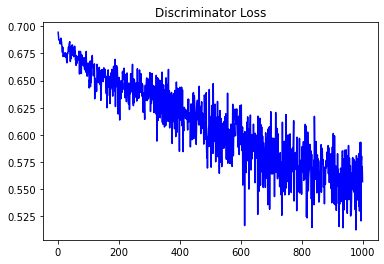

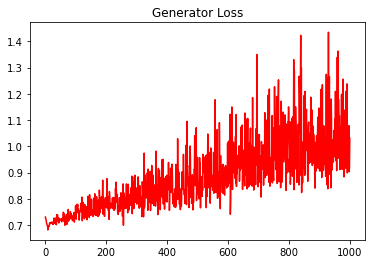

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.47555419652257114


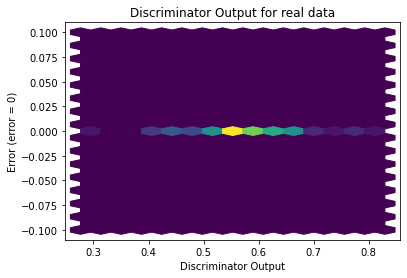

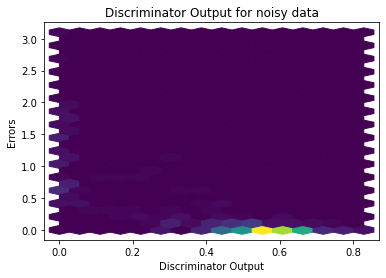

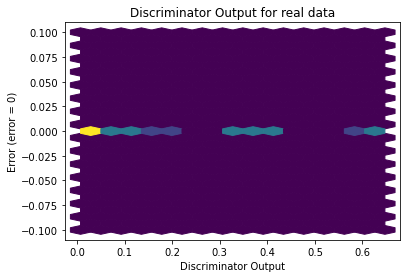

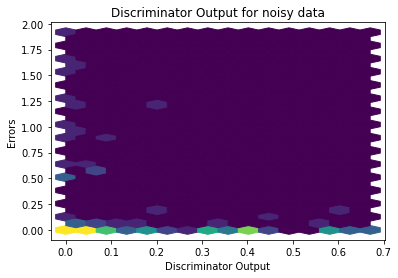

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


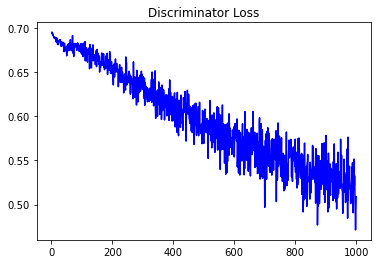

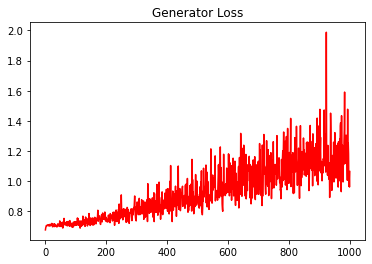

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.4670760290999897


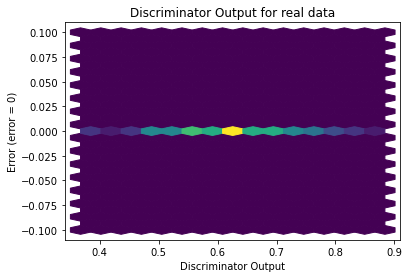

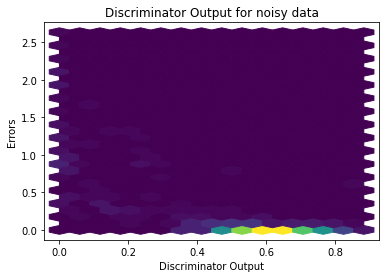

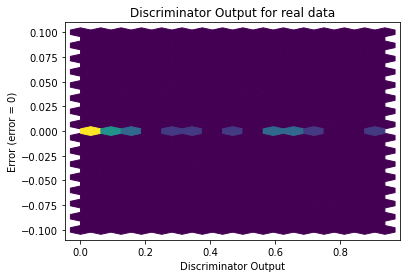

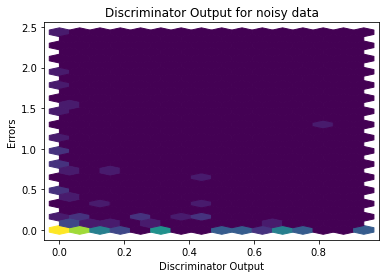

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6089]], requires_grad=True)
